Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [56]:
# imports

import requests
import json
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import datetime




In [44]:
# LOAD DATAFRAMES FROM FILE
fsqr_df = pd.read_csv("../csv_folder/fsqr_response_df.csv")
city_bikes_df = pd.read_csv("../csv_folder/city_bikes_df.csv")


### Count the number of unique categories in Foursquare DataFrame:

In [45]:
fsqr_df['categories'].nunique()

531

### Clean Up - Create 3 major parent categories: Bar/Restaurant, Bar, Restaurant, Park, Other

In [ ]:
# FUNCTION TO CLASSIFY CATEGORIES
def classify_categories(cat_list):

# DEFINE KEYWORDS FOR EACH CATEGORY
    bar_keywords = {
        'wine bar', 'beer bar', 'beer', 'brewery', 'pub', 'lounge',
        'gastropub', 'wings', 'cocktail'
    }
    restaurant_keywords = {
        'restaurant', 'sandwich', 'bakery', 'steakhouse', 'café', 'pizzeria',
        'sushi', 'burger', 'diner', 'deli', 'food', 'ice cream', 'seafood'
    }
    park_keywords = {
        'park', 'soccer', 'baseball', 'playground', 'field', 'hockey', 
    }

    # CONVERT CATEGORY LIST TO LOWERCASE
    cat_list = [str(cat).lower() for cat in cat_list]

    # ASSIGN TO THE RIGHT CATEGORY
    is_bar = any(kw in cat for cat in cat_list for kw in bar_keywords)
    is_restaurant = any(kw in cat for cat in cat_list for kw in restaurant_keywords)
    is_park = any(kw in cat for cat in cat_list for kw in park_keywords)

    # RETURN RESULTS
    if is_bar and is_restaurant:
        return "Bar/Restaurant"
    elif is_bar:
        return "Bar"
    elif is_restaurant:
        return "Restaurant"
    elif is_park:
        return "Park"
    else:
        return "Other"

### Since fsqr_df['categories] is a string representation of a Python list and not an actual list, sometimes the classify_categories() function receives a string, not a list and defaults to other. Code below will wix this

In [ ]:
import ast

# APPLY THE FUNCTION ABOVE
fsqr_df['category_combined'] = fsqr_df['categories'].apply(classify_categories)

# IF THERE IS ONLY "OTHER" CATEGORY
all_other = fsqr_df['category_combined'].nunique() == 1 and fsqr_df['category_combined'].unique()[0] == "Other"

# CHANGE TYPE FROM STR TO LIST
if all_other:
    print("Re-parsing categories and reclassifying...")
    fsqr_df['categories'] = fsqr_df['categories'].apply(ast.literal_eval)
    fsqr_df['category_combined'] = fsqr_df['categories'].apply(classify_categories)
else:
    print("category_combined looks fine — skipping re-parse.")


# fsqr_df['categories'] = fsqr_df['categories'].apply(ast.literal_eval)


# fsqr_df['category_combined'] = fsqr_df['categories'].apply(classify_categories)
fsqr_df

category_combined looks fine — skipping re-parse.


,Unnamed: 0,station_id,place_name,latitude,longitude,address,categories,category_combined
0,0,0,The Don Valley Brick Works Park,43.684526,-79.365204,"Bayview Ave, Toronto ON M4W 3X8",[Park],Park
1,1,0,Chorley Park,43.687377,-79.370803,"250 Douglas Dr. (Glenn Rd.(Summerhill Av.)), T...",[Park],Park
2,2,0,Moore Park Ravine,43.693691,-79.379762,"205 Moore Ave, Toronto ON M4T 2K7",[Park],Park
3,3,0,David A. Balfour Park,43.685607,-79.388253,"200 Mount Pleasant Rd, Toronto ON M4T 2C4",[Park],Park
4,4,0,Craigleigh Gardens,43.677005,-79.373692,"160 South Drive (at Elm Ave), Toronto ON",[Park],Park
...,...,...,...,...,...,...,...,...
9342,9342,936,Richmond Station,43.651569,-79.379266,"1 Richmond Street West (Yonge Street), Toronto...",[American Restaurant],Restaurant
9343,9343,936,Gyubee Japanese Grill,43.655187,-79.385793,"157 Dundas St W, Toronto ON M5B 1E4",[Japanese Restaurant],Restaurant
9344,9344,936,Barberian's Steak House,43.657755,-79.382177,"7 Elm St. (at Yonge St.), Toronto ON M5G 1H1",[Steakhouse],Restaurant
9345,9345,936,Kinka Izakaya Original,43.660596,-79.378891,"398 Church St (McGill Street), Toronto ON M5B 2A2","[Japanese Restaurant, Sake Bar]",Restaurant


In [49]:
fsqr_df['category_combined'].describe()

count           9347
unique             5
top       Restaurant
freq            5961
Name: category_combined, dtype: object

In [ ]:
# COUNT OF EACH MAJOR CATEGORY PER STATION
category_counts = fsqr_df.groupby(['station_id', 'category_combined']).size().unstack(fill_value=0).reset_index()
category_counts.to_csv('../csv_folder/category_counts.csv')


In [53]:
city_bikes_df

,Unnamed: 0,name,latitude,longitude,timestamp,free_bikes,empty_slots,renting,returning,ebikes
0,0,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,2025-07-29T03:42:28.795612+00:00Z,3,5,1,1,0
1,1,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,2025-07-29T03:42:28.933107+00:00Z,10,9,1,1,1
2,2,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,2025-07-29T03:42:28.879177+00:00Z,2,16,1,1,0
3,3,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,2025-07-29T03:42:28.733970+00:00Z,2,4,1,1,0
4,4,420 Wellington St W,43.643834,-79.396649,2025-07-29T03:42:28.788527+00:00Z,4,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...
932,932,457 King St W,43.645209,-79.396074,2025-07-29T03:42:28.791021+00:00Z,5,12,1,1,0
933,933,Danforth Ave / Coxwell Ave,43.683378,-79.322961,2025-07-29T03:42:28.788025+00:00Z,14,1,1,1,5
934,934,Bloor St W / Brock Ave,43.658988,-79.438715,2025-07-29T03:42:28.879738+00:00Z,0,10,1,1,0
935,935,Wells Hill Ave / St. Clair Ave W,43.683351,-79.415620,2025-07-29T03:42:28.791375+00:00Z,0,15,1,1,0


### Clean Up - Convert timestamp column

In [58]:
# CONVERT STRING TO PANDAS DATETIME64[NS, UTC OBJECT
city_bikes_df['timestamp'] = pd.to_datetime(city_bikes_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f%zZ', utc=True).dt.date

In [59]:
city_bikes_df

,Unnamed: 0,name,latitude,longitude,timestamp,free_bikes,empty_slots,renting,returning,ebikes
0,0,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,2025-07-29,3,5,1,1,0
1,1,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,2025-07-29,10,9,1,1,1
2,2,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,2025-07-29,2,16,1,1,0
3,3,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,2025-07-29,2,4,1,1,0
4,4,420 Wellington St W,43.643834,-79.396649,2025-07-29,4,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...
932,932,457 King St W,43.645209,-79.396074,2025-07-29,5,12,1,1,0
933,933,Danforth Ave / Coxwell Ave,43.683378,-79.322961,2025-07-29,14,1,1,1,5
934,934,Bloor St W / Brock Ave,43.658988,-79.438715,2025-07-29,0,10,1,1,0
935,935,Wells Hill Ave / St. Clair Ave W,43.683351,-79.415620,2025-07-29,0,15,1,1,0


In [60]:
merged_df = pd.merge(city_bikes_df, category_counts, left_index=True, right_on='station_id')
merged_df.to_csv("../csv_folder/bikes_places.csv")

merged_df

,Unnamed: 0,name,latitude,longitude,timestamp,free_bikes,empty_slots,renting,returning,ebikes,station_id,Bar,Bar/Restaurant,Other,Park,Restaurant
0,0,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,2025-07-29,3,5,1,1,0,0,0,0,1,9,0
1,1,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,2025-07-29,10,9,1,1,1,1,1,0,0,5,4
2,2,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,2025-07-29,2,16,1,1,0,2,0,0,2,0,8
3,3,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,2025-07-29,2,4,1,1,0,3,1,3,1,2,3
4,4,420 Wellington St W,43.643834,-79.396649,2025-07-29,4,9,1,1,0,4,1,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,932,457 King St W,43.645209,-79.396074,2025-07-29,5,12,1,1,0,932,1,1,1,0,7
933,933,Danforth Ave / Coxwell Ave,43.683378,-79.322961,2025-07-29,14,1,1,1,5,933,2,0,0,2,6
934,934,Bloor St W / Brock Ave,43.658988,-79.438715,2025-07-29,0,10,1,1,0,934,3,0,0,2,5
935,935,Wells Hill Ave / St. Clair Ave W,43.683351,-79.415620,2025-07-29,0,15,1,1,0,935,0,0,1,1,8


Clean up - check for duplicates

In [34]:
duplicates = merged_df[merged_df.duplicated()]

print(f"Total duplicate rows: {len(duplicates)}")
duplicates.head()

Total duplicate rows: 0


,Unnamed: 0,name,latitude,longitude,timestamp,free_bikes,empty_slots,renting,returning,ebikes,station_id,Bar,Bar/Restaurant,Other,Park,Restaurant


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

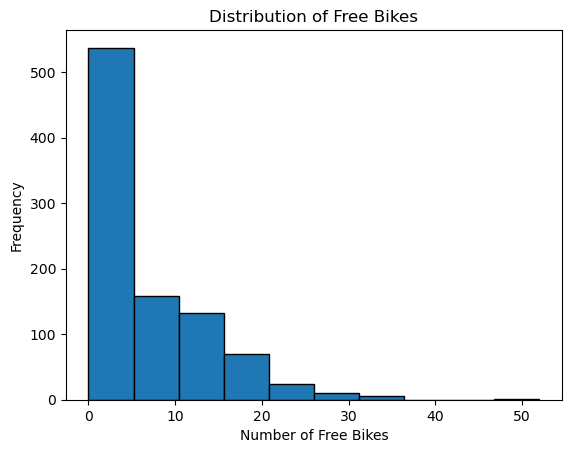

In [36]:
import matplotlib.pyplot as plt

plt.hist(merged_df['free_bikes'], bins=10, edgecolor='black')
plt.title('Distribution of Free Bikes')
plt.xlabel('Number of Free Bikes')
plt.ylabel('Frequency')
plt.show()

#### Observations

1. **Right-Skewed Distribution:**
   - Most of the bars are concentrated near 0–5 free bikes.
   - As the number of free bikes increases, the frequency drops off sharply.
   - This means most stations have very few bikes available at the moment of data capture

2. **Heavy concentration around 0–10 free bikes:**
   - The tallest bar (leftmost) shows that over 500 stations had between 0 and ~5 bikes available.
   - This could indicate frequent high demand, insufficient redistribution, or timing during peak usage hours.

3. **Long tail up to ~50:**
   - A few stations have high availability (more than 30), which could be outliers


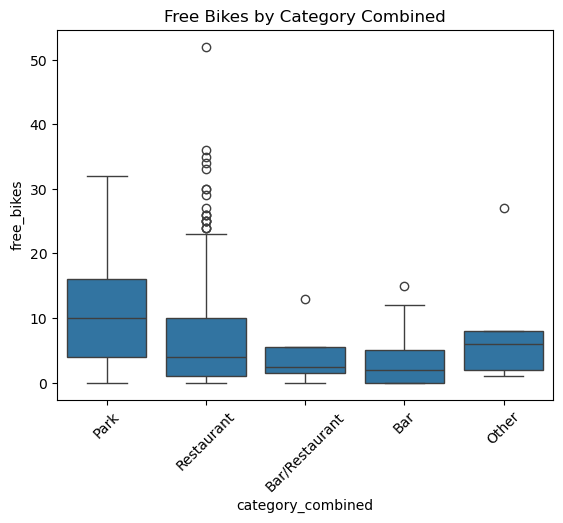

In [ ]:
category_cols = ['Bar', 'Bar/Restaurant', 'Other', 'Park', 'Restaurant']
merged_df['category_combined'] = merged_df[category_cols].idxmax(axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=merged_df, x='category_combined', y='free_bikes')
plt.xticks(rotation=45)
plt.title("Free Bikes by Category Combined")
plt.show()

1. **Parks** have the highest and most varied free bike availability.
2. **Restaurants** show high variability with many outliers, suggesting inconsistent usage.
3. **Bar/Restaurant** locations have the lowest and most tightly clustered availability.
4. **Bars** and **Other** locations sit somewhere in between, with consistently low but slightly more variable availability.
5. **Outliers** Mostly identified for Retaurant category

## Clean up - Drop outliers

In [38]:
outlier_index = merged_df[merged_df['free_bikes'] > 35].index
merged_df.drop(outlier_index, inplace=True)
merged_df.to_csv("../csv_folder/bikes_places_cleaned.csv")

## BOX Plot after dropping outliers. 

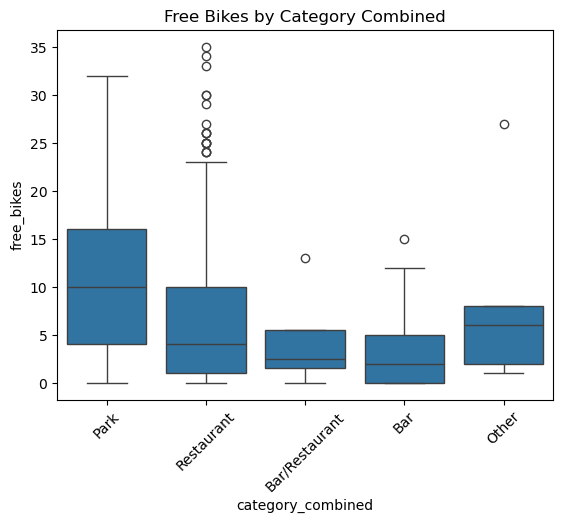

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=merged_df, x='category_combined', y='free_bikes')
plt.xticks(rotation=45)
plt.title("Free Bikes by Category Combined")
plt.show()

Outliers still exist but within the rant of other categories.

/var/folders/z3/y2_p99fj4j92d7qny0yr47pc0000gp/T/ipykernel_1466/2228227365.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="category_combined", y="free_bikes", data=merged_df, estimator='mean', ci=None, palette="pastel")
/var/folders/z3/y2_p99fj4j92d7qny0yr47pc0000gp/T/ipykernel_1466/2228227365.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category_combined", y="free_bikes", data=merged_df, estimator='mean', ci=None, palette="pastel")


Text(0.5, 1.0, 'Average Free Bikes by Venue Category')

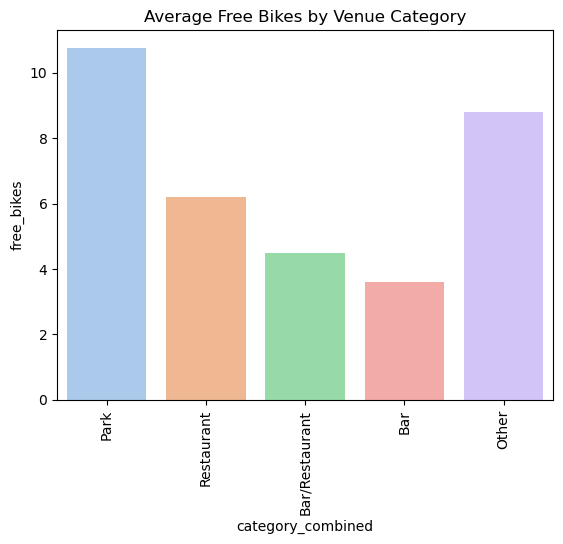

In [40]:
sns.barplot(x="category_combined", y="free_bikes", data=merged_df, estimator='mean', ci=None, palette="pastel")
plt.xticks(rotation=90)
plt.title("Average Free Bikes by Venue Category")

#### Among all categories Park, Restaurant and Other seem to correlate the most with average count of free bikes.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [74]:
import os
import pandas as pd
import sqlite3

conn = sqlite3.connect('../data/bikes_places.db')

df_networks = pd.read_csv("../csv_folder/df_networks.csv")

df_networks.to_sql('df_networks', conn, if_exists='replace', index=False)

city_bikes_df = pd.read_csv("../csv_folder/city_bikes_df.csv")

city_bikes_df.to_sql('city_bikes', conn, if_exists='replace', index=False)

category_counts_df = pd.read_csv("../csv_folder/category_counts.csv")

category_counts_df.to_sql('category_counts', conn, if_exists='replace', index=False)

conn.close()


In [73]:
import sqlite3

conn = sqlite3.connect('../data/bikes_places.db')
cursor = conn.cursor()

df = pd.read_sql_query("SELECT * FROM category_counts", conn)

conn.close()

df

,Unnamed: 0,station_id,Bar,Bar/Restaurant,Other,Park,Restaurant
0,0,0,0,0,1,9,0
1,1,1,1,0,0,5,4
2,2,2,0,0,2,0,8
3,3,3,1,3,1,2,3
4,4,4,1,1,1,1,6
...,...,...,...,...,...,...,...
932,932,932,1,1,1,0,7
933,933,933,2,0,0,2,6
934,934,934,3,0,0,2,5
935,935,935,0,0,1,1,8


In [62]:
import sqlite3

conn = sqlite3.connect('../data/bikes_places.db')
cursor = conn.cursor()

df = pd.read_sql_query("SELECT * FROM city_bikes", conn)

conn.close()

df

,Unnamed: 0,name,latitude,longitude,timestamp,free_bikes,empty_slots,renting,returning,ebikes
0,0,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,2025-07-29T03:42:28.795612+00:00Z,3,5,1,1,0
1,1,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,2025-07-29T03:42:28.933107+00:00Z,10,9,1,1,1
2,2,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,2025-07-29T03:42:28.879177+00:00Z,2,16,1,1,0
3,3,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,2025-07-29T03:42:28.733970+00:00Z,2,4,1,1,0
4,4,420 Wellington St W,43.643834,-79.396649,2025-07-29T03:42:28.788527+00:00Z,4,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...
932,932,457 King St W,43.645209,-79.396074,2025-07-29T03:42:28.791021+00:00Z,5,12,1,1,0
933,933,Danforth Ave / Coxwell Ave,43.683378,-79.322961,2025-07-29T03:42:28.788025+00:00Z,14,1,1,1,5
934,934,Bloor St W / Brock Ave,43.658988,-79.438715,2025-07-29T03:42:28.879738+00:00Z,0,10,1,1,0
935,935,Wells Hill Ave / St. Clair Ave W,43.683351,-79.415620,2025-07-29T03:42:28.791375+00:00Z,0,15,1,1,0


## Clean Up - Convert timestamp to date

In [63]:
import sqlite3

conn = sqlite3.connect('../data/bikes_places.db')
cursor = conn.cursor()
cursor.execute("""
UPDATE city_bikes
SET timestamp = substr(timestamp, 1, 10);""")
conn.commit()
conn.close()

## Validate

In [65]:
import sqlite3

conn = sqlite3.connect('../data/bikes_places.db')
cursor = conn.cursor()

df = pd.read_sql_query("SELECT * FROM city_bikes", conn)

conn.close()
df


,Unnamed: 0,name,latitude,longitude,timestamp,free_bikes,empty_slots,renting,returning,ebikes
0,0,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,2025-07-29,3,5,1,1,0
1,1,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,2025-07-29,10,9,1,1,1
2,2,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,2025-07-29,2,16,1,1,0
3,3,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,2025-07-29,2,4,1,1,0
4,4,420 Wellington St W,43.643834,-79.396649,2025-07-29,4,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...
932,932,457 King St W,43.645209,-79.396074,2025-07-29,5,12,1,1,0
933,933,Danforth Ave / Coxwell Ave,43.683378,-79.322961,2025-07-29,14,1,1,1,5
934,934,Bloor St W / Brock Ave,43.658988,-79.438715,2025-07-29,0,10,1,1,0
935,935,Wells Hill Ave / St. Clair Ave W,43.683351,-79.415620,2025-07-29,0,15,1,1,0


### Join bikes_places and city_bikes in a new table: bikes_places

In [ ]:
import sqlite3

conn = sqlite3.connect('../data/bikes_places.db')
cursor = conn.cursor()

# DROP IF EXISTS
cursor.execute("DROP TABLE IF EXISTS bikes_places")

# CREATE THE TABLE
cursor.execute("""
CREATE TABLE bikes_places AS
SELECT DISTINCT 
    city_bikes.name, 
    city_bikes.latitude, 
    city_bikes.longitude, 
    substr(city_bikes.timestamp, 1, 10) AS date_only, 
    city_bikes.free_bikes,
    city_bikes.empty_slots, 
    city_bikes.renting, 
    city_bikes."returning" AS returning_flag, 
    city_bikes.ebikes, 
    category_counts.station_id, 
    category_counts.Bar, 
    category_counts."Bar/Restaurant",
    category_counts.Other,
    category_counts.Park,
    category_counts.Restaurant
FROM city_bikes 
INNER JOIN category_counts
ON city_bikes."Unnamed: 0" = category_counts.station_id""")

conn.commit()
conn.close()

## Validate

In [99]:
import sqlite3

conn = sqlite3.connect('../data/bikes_places.db')
cursor = conn.cursor()

df = pd.read_sql_query("SELECT * FROM bikes_places", conn)

conn.close()
df

,name,latitude,longitude,date_only,free_bikes,empty_slots,renting,returning_flag,ebikes,station_id,Bar,Bar/Restaurant,Other,Park,Restaurant
0,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,2025-07-29,3,5,1,1,0,0,0,0,1,9,0
1,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,2025-07-29,10,9,1,1,1,1,1,0,0,5,4
2,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,2025-07-29,2,16,1,1,0,2,0,0,2,0,8
3,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,2025-07-29,2,4,1,1,0,3,1,3,1,2,3
4,420 Wellington St W,43.643834,-79.396649,2025-07-29,4,9,1,1,0,4,1,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,457 King St W,43.645209,-79.396074,2025-07-29,5,12,1,1,0,932,1,1,1,0,7
933,Danforth Ave / Coxwell Ave,43.683378,-79.322961,2025-07-29,14,1,1,1,5,933,2,0,0,2,6
934,Bloor St W / Brock Ave,43.658988,-79.438715,2025-07-29,0,10,1,1,0,934,3,0,0,2,5
935,Wells Hill Ave / St. Clair Ave W,43.683351,-79.415620,2025-07-29,0,15,1,1,0,935,0,0,1,1,8


Look at the data before and after the join to validate your data.

In [ ]:
import sqlite3

conn = sqlite3.connect('../data/bikes_places.db')  #CONNECT TO DB
cursor = conn.cursor()

In [ ]:
# FUNCTION TO COUNT ROWS
def count_rows(table_name):
    cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
    count = cursor.fetchone()[0]
    print(f"{table_name} has {count} rows.")
    return count

In [105]:
city_bikes_count = count_rows("city_bikes")
category_counts_count = count_rows("category_counts")
bikes_places_count = count_rows("bikes_places")

city_bikes has 937 rows.
category_counts has 937 rows.
bikes_places has 937 rows.
